<div style="text-align: center; background-color: #f2f2f2; padding: 15px;">
  <h1 style="color: #f39c12; font-size: 35px;">Melbourne Housing</h1>
</div>

![](https://www.segurospromo.com.br/blog/wp-content/uploads/2020/09/melbourne-australia.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('melb_data.csv')
print(df.shape)
df.head()

(13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [5]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #d35400; font-size: 25px;">Data Preprocessing</h1>
</div>

### Missing Values
- Columns BuildingArea, YearBuild and CouncilArea have missing values

In [7]:
# creating a function to insert the median relative to Suburb in a given column

def miss_median_suburb(col):
    for suburb in df.Suburb.unique():
        val = df.loc[df.Suburb == suburb, col].median()
        if np.isnan(val):
            df.loc[(df[col].isnull()) & (df.Suburb == suburb), col] = df.BuildingArea.median()
        else: 
            df.loc[(df[col].isnull()) & (df.Suburb == suburb), col] = val

In [8]:
# using the function to inpute values to null fields

miss_median_suburb('BuildingArea')
miss_median_suburb('YearBuilt')

> - Now, both the null values for the year and the size of the building are **the median values** of these values in relation to the **suburb** where these houses reside

In [9]:
# assigning the median to null values in Car column

ipt_median = SimpleImputer(strategy='median', missing_values=np.nan)

df['Car'] = ipt_median.fit_transform(df.Car.values.reshape(-1, 1))

In [10]:
# assigning the value 'Unknown' to null values in Council Area column

df['CouncilArea'].fillna('Unknown', inplace=True)

### Wrong Type
- The Date column is type categorical

In [11]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   13580 non-null  float64       
 15  YearBuilt      1358

### Outliers

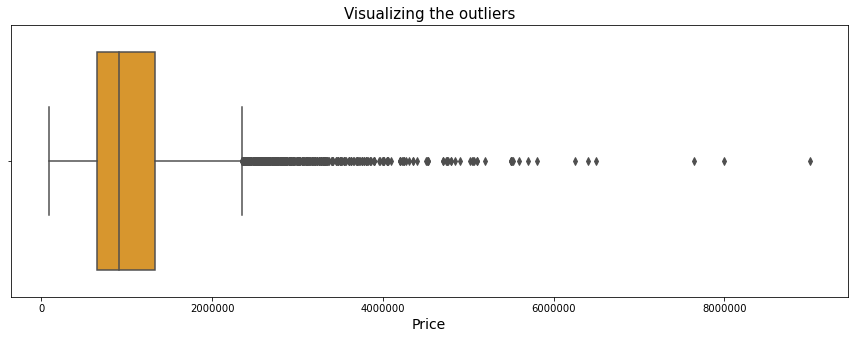

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(data=df, x='Price', orient='H', color='#f39c12')

ax.set_title('Visualizing the outliers', fontsize=15)
ax.set_xlabel('Price', fontsize=14)

ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

In [14]:
prices = df.Price

q1 = prices.quantile(0.25)
q3 = prices.quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr

In [15]:
outliers = df[df.Price >= upper_tail]

In [16]:
outliers.shape

(624, 21)

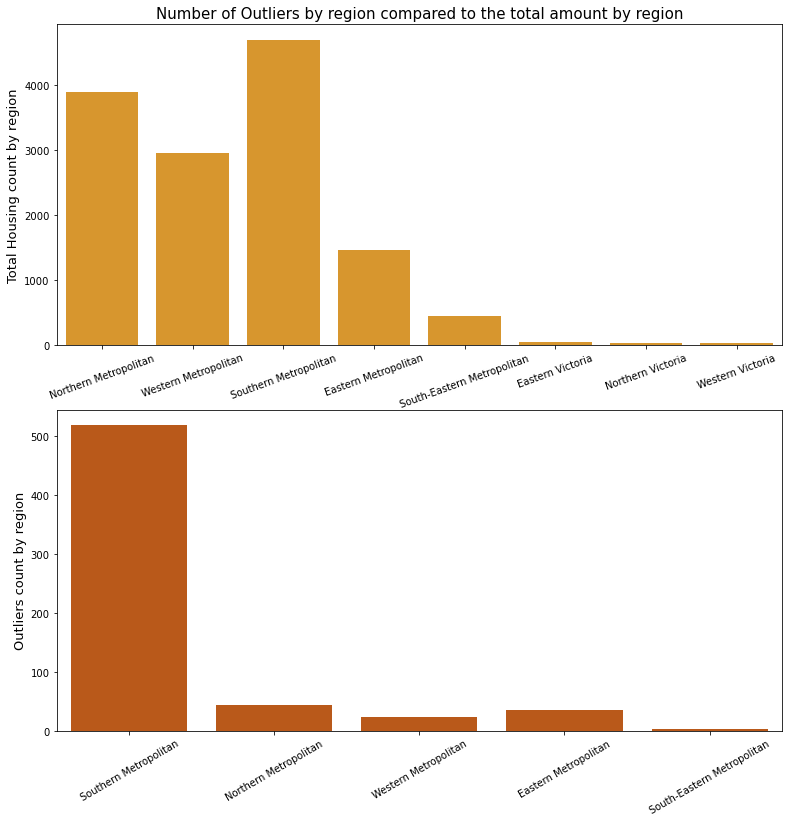

In [17]:
fig, ax = plt.subplots(figsize=(13, 13), nrows=2)

sns.countplot(data=df, x='Regionname', ax=ax[0], color='#f39c12')
sns.countplot(data=outliers, x='Regionname', ax=ax[1], color='#d35400')

ax[0].tick_params(axis='x', rotation=20)
ax[0].set_xlabel('')
ax[0].set_ylabel('Total Housing count by region', fontsize=13)
ax[0].set_title('Number of Outliers by region compared to the total amount by region', fontsize=15)

ax[1].tick_params(axis='x', rotation=30)
ax[1].set_ylabel('Outliers count by region', fontsize=13)
ax[1].set_xlabel('')

plt.show()

> - We can see that there is a huge concentration of houses extremely expensives on Southerm Metropolitan
> - So we will not remove the outliers, as they may be important values for houses in this specific region

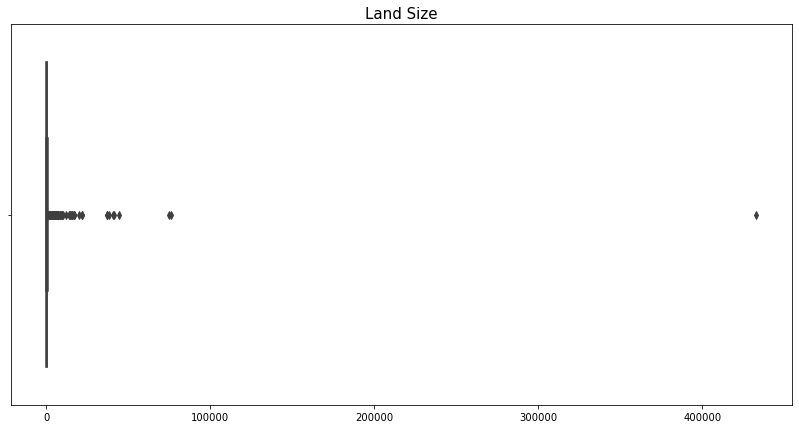

In [18]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.boxplot(data=df, x='Landsize', ax=ax)
ax.set_title('Land Size', fontsize=15)
ax.set_xlabel('')

plt.show()

> - Ok, it has absurdly high values, let's remove them

In [19]:
df.drop(df.index[df.Landsize >= 30000], inplace=True)

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #d35400; font-size: 25px;">Exploratory Data Analysis</h1>
</div>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13571 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13571 non-null  object        
 1   Address        13571 non-null  object        
 2   Rooms          13571 non-null  int64         
 3   Type           13571 non-null  object        
 4   Price          13571 non-null  float64       
 5   Method         13571 non-null  object        
 6   SellerG        13571 non-null  object        
 7   Date           13571 non-null  datetime64[ns]
 8   Distance       13571 non-null  float64       
 9   Postcode       13571 non-null  float64       
 10  Bedroom2       13571 non-null  float64       
 11  Bathroom       13571 non-null  float64       
 12  Car            13571 non-null  float64       
 13  Landsize       13571 non-null  float64       
 14  BuildingArea   13571 non-null  float64       
 15  YearBuilt      1357

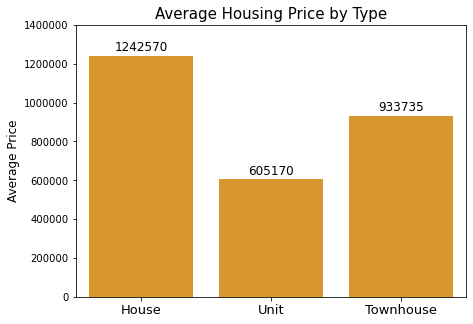

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.barplot(data=df, x='Type', y='Price', ax=ax, color='#f39c12', ci=None)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.yaxis.get_major_formatter().set_scientific(False)

ax.set_title('Average Housing Price by Type', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Average Price', fontsize=12)
ax.set_xticklabels(['House', 'Unit', 'Townhouse'], fontsize=13)

for p in ax.patches:
    height = p.get_height()
    if not height:
        continue
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', fontsize=12)
    
ax.set_ylim(0, 1400000)

plt.show()

> - House is the most expensive type of housing in Melbourne, twice as expensive as Unit or Duplex

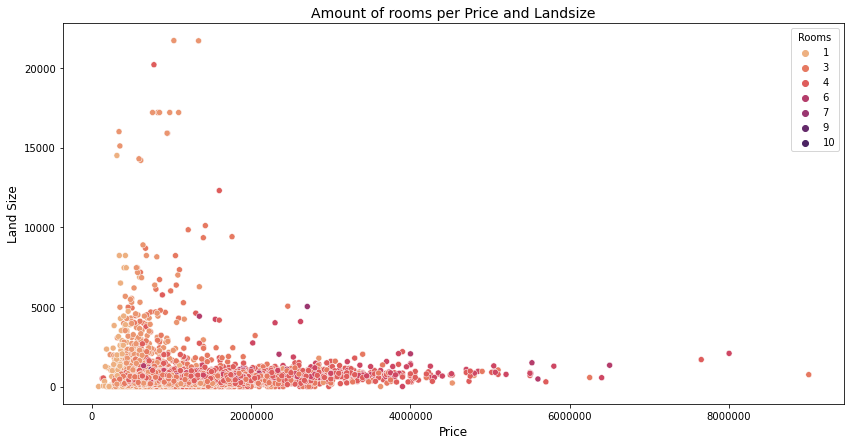

In [22]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.scatterplot(data=df, x='Price', y='Landsize', hue='Rooms', ax=ax, palette='flare')

ax.set_title('Amount of rooms per Price and Landsize', fontsize=14)

ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.xaxis.get_major_formatter().set_scientific(False)

ax.set_ylabel('Land Size', fontsize=12)
ax.set_xlabel('Price', fontsize=12)

plt.show()

> - It is possible to see that as the price increases, the number of rooms also increases
> - The size of the land, it seems not to influence much

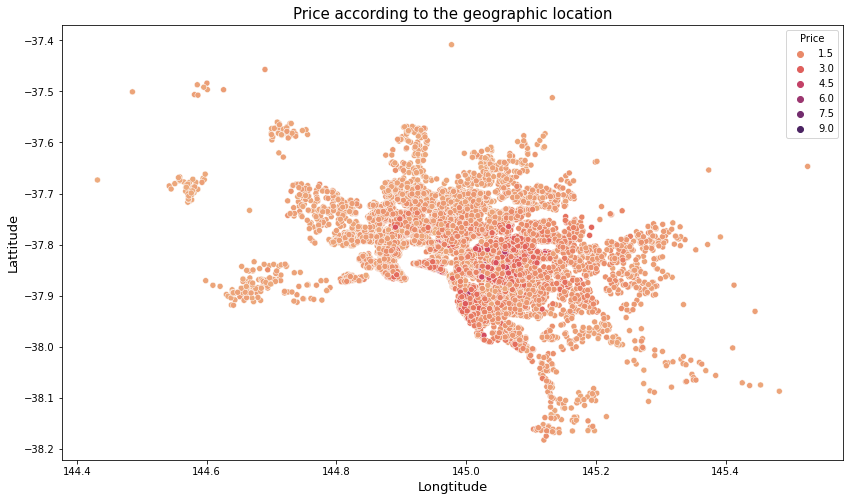

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(data=df, x='Longtitude', y='Lattitude', hue='Price', ax=ax, palette='flare')

ax.set_title('Price according to the geographic location', fontsize=15)
ax.set_ylabel('Lattitude', fontsize=13)
ax.set_xlabel('Longtitude', fontsize=13)

plt.show()

> - As we have already seen, the southern metropolitan area of melbourne has the highest concentration of more expensive housing.

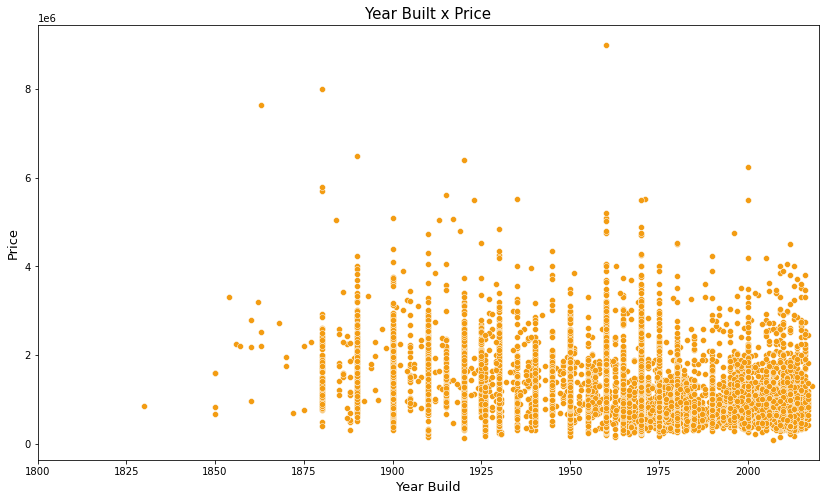

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(data=df, x='YearBuilt', y='Price', ax=ax, color='#f39c12')

ax.set_title('Year Built x Price', fontsize=15)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.xaxis.get_major_formatter().set_scientific(False)

ax.set_xlim(1800, 2020)

ax.set_ylabel('Price', fontsize=13)
ax.set_xlabel('Year Build', fontsize=13)

plt.show()

> - Building year does not seem to have a significant correlation with price

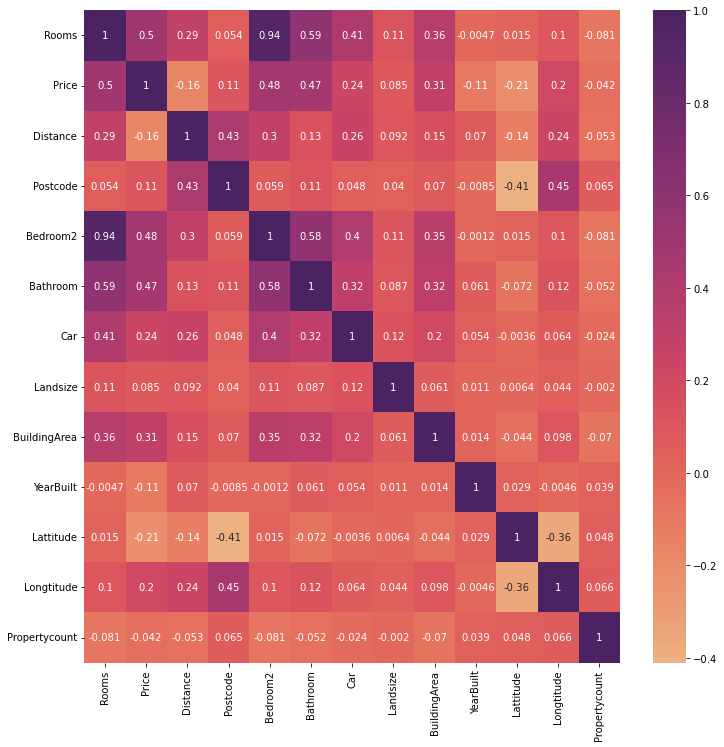

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df.corr(), annot=True, cmap='flare')

plt.show()

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #d35400; font-size: 25px;">Data Preparation</h1>
</div>

> -  let's exclude some columns that do not interfere with the target, and also some columns with categorical values and with several distinct values that are impossible to be divided in get_dummies

In [26]:
list_drop = ['Suburb', 'Address', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Propertycount']

df.drop(list_drop, axis=1, inplace=True)

In [27]:
df = pd.get_dummies(df)

In [28]:
X = df.drop('Price', axis=1)
y = df.Price

In [29]:
scaler = MinMaxScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

In [30]:
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.052743,0.10,0.125,0.1,0.009302,0.014431,0.956119,0.494755,0.517651,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.052743,0.10,0.125,0.0,0.007184,0.011633,0.937616,0.484031,0.513083,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.052743,0.15,0.250,0.0,0.006171,0.022088,0.937616,0.482223,0.513997,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.052743,0.15,0.250,0.1,0.004329,0.014431,0.956119,0.498243,0.516281,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.052743,0.15,0.125,0.2,0.005526,0.020910,0.997885,0.484936,0.513723,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> - Now, we need split the data into training and test data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
X_train.shape, X_test.shape

((10178, 26), (3393, 26))

<div style="text-align: center; background-color: #f2f2f2; padding: 10px;">
  <h1 style="color: #d35400; font-size: 25px;">Machine Learning</h1>
</div>

In [33]:
def cross_model(model, X_train, y_train, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=12)
    results = cross_val_score(model, X=X_train, y=y_train, cv=kf, scoring='neg_mean_squared_error')

    mean_results = np.mean(results)
    std_results = np.std(results)

    return mean_results, std_results

In [34]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(max_iter=100000),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [35]:
n_splits = 10

for model in models:
    mean, std = cross_model(model, X_train, y_train, n_splits)
    print(f'{model.__class__.__name__}: \n mean -> {mean} \n std -> {std} \n')

LinearRegression: 
 mean -> -169842212040.73026 
 std -> 30783319724.56723 

Ridge: 
 mean -> -167450710208.58893 
 std -> 27958310790.681786 

Lasso: 
 mean -> -169821970602.37836 
 std -> 30703545155.373215 

DecisionTreeRegressor: 
 mean -> -177158315484.9073 
 std -> 45618910747.77129 

RandomForestRegressor: 
 mean -> -85369809175.39812 
 std -> 23471073343.585026 

GradientBoostingRegressor: 
 mean -> -99435917879.24702 
 std -> 24532397648.560173 



> - The model with best MSE evaluation was RandomForest

### GridSearchCV

> - Using GridSearchCV to make the best RandomForest model to predict the test data

In [36]:
params = {
    'n_estimators' : [70, 90, 110],
    'criterion': ['squared_error'],
    'max_features': ['sqrt', 'log2']
}

In [37]:
reg_model = RandomForestRegressor()

In [38]:
grid = GridSearchCV(reg_model, param_grid=params, scoring='neg_mean_squared_error')

In [39]:
grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 110}

In [40]:
best_model = grid.best_estimator_

In [41]:
# using the best model to predict the testing data

y_pred = best_model.predict(X_test)

In [42]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 70334492945.89363


In [43]:
# comparing some of the values predicted by the model

for i in range(10, 20):
    print(f'({i}) Real Value -> {y_test.values[i]:.0f} ----- Predicted Value -> {y_pred[i]:.0f}\n')

(10) Real Value -> 1078000 ----- Predicted Value -> 1180286

(11) Real Value -> 485000 ----- Predicted Value -> 542275

(12) Real Value -> 940000 ----- Predicted Value -> 1191145

(13) Real Value -> 1816000 ----- Predicted Value -> 1464850

(14) Real Value -> 313000 ----- Predicted Value -> 420482

(15) Real Value -> 890000 ----- Predicted Value -> 775151

(16) Real Value -> 465000 ----- Predicted Value -> 416877

(17) Real Value -> 435000 ----- Predicted Value -> 485341

(18) Real Value -> 675000 ----- Predicted Value -> 799491

(19) Real Value -> 1120000 ----- Predicted Value -> 1046827

